In [2]:
import pandas as pd
import datetime
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
from kmodes.kprototypes import KPrototypes 

In [3]:
from collections import defaultdict

In [4]:
data = pd.read_csv("../Crimes_-_2001_to_Present.csv");
data = data.drop(columns=['Case Number', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude'])
print('--------------- Unecessary Columns DROPPED ----------------------------------')
print(data.columns)
print(data.shape)
print()

print('--------------------- Initializing 2021 data -------------------------------')
data21 = data[data['Year'] >= 2021]
print(data21.columns)
print(data21.shape)
print('----------------------------------------------------------------------------')

del data

print('----------- Calculating seconds hour and month for the data --------------------')
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']]

data21['month'] = [d.date().month for d in data21['Date']] 

data21['time'] = [d.time() for d in data21['Date']] 
data21['time'] = data21['time'].astype(str)

data21['hour'] = [d.time().hour for d in data21['Date']]


--------------- Unecessary Columns DROPPED ----------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(7423485, 14)

--------------------- Initializing 2021 data -------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(161283, 14)
----------------------------------------------------------------------------
----------- Calculating seconds hour and month for the data --------------------


In [5]:
data21['Domestic'].iloc[0]

True

In [96]:
data21.columns

Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location', 'date', 'month', 'time', 'hour',
       'district'],
      dtype='object')

In [97]:
sub_data = data21.drop(columns=['ID', 'Date', 'Block', 'Description', 'Location Description', 'District', 'Ward', 'Community Area', 'Year', 'Location', 'date', 'time'])

In [98]:
sub_data.columns

Index(['IUCR', 'Primary Type', 'Arrest', 'Domestic', 'month', 'hour',
       'district'],
      dtype='object')

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 0, ncost: 10324631.65603499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 0, ncost: 10324631.65603499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 0, ncost: 10324631.65603499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 0, ncost: 10324631.65603499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/20, moves: 0, ncost: 10324631.65603499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/20, moves: 0, ncost: 10324631.65603499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/20, moves: 0, ncost: 10324631.656034

Run: 5, iteration: 3/20, moves: 10973, ncost: 3554448.9936092095
Run: 5, iteration: 4/20, moves: 4086, ncost: 3545806.1220819904
Run: 5, iteration: 5/20, moves: 2314, ncost: 3542560.4497178425
Run: 5, iteration: 6/20, moves: 1670, ncost: 3541306.1916617197
Run: 5, iteration: 7/20, moves: 669, ncost: 3541055.2935153632
Run: 5, iteration: 8/20, moves: 114, ncost: 3541047.367950328
Run: 5, iteration: 9/20, moves: 0, ncost: 3541047.367950328
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/20, moves: 35964, ncost: 4728403.312465833
Run: 6, iteration: 2/20, moves: 24937, ncost: 4114733.206957837
Run: 6, iteration: 3/20, moves: 27078, ncost: 3635087.916282676
Run: 6, iteration: 4/20, moves: 12210, ncost: 3562785.2457660013
Run: 6, iteration: 5/20, moves: 7456, ncost: 3542383.468268599
Run: 6, iteration: 6/20, moves: 1792, ncost: 3540892.39524942
Run: 6, iteration: 7/20, moves: 211, ncost: 3540867.642844649
Run: 6, iteration: 8/20, moves: 92

Run: 7, iteration: 8/20, moves: 61, ncost: 3161486.723994484
Run: 7, iteration: 9/20, moves: 0, ncost: 3161486.723994484
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/20, moves: 19432, ncost: 3184894.5830620183
Run: 8, iteration: 2/20, moves: 6581, ncost: 3179143.7555453773
Run: 8, iteration: 3/20, moves: 2655, ncost: 3176542.772905456
Run: 8, iteration: 4/20, moves: 656, ncost: 3176307.625529597
Run: 8, iteration: 5/20, moves: 123, ncost: 3176299.138381054
Run: 8, iteration: 6/20, moves: 0, ncost: 3176299.138381054
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/20, moves: 44574, ncost: 3223372.6167475665
Run: 9, iteration: 2/20, moves: 9536, ncost: 3187494.4145650286
Run: 9, iteration: 3/20, moves: 3835, ncost: 3182267.6659355653
Run: 9, iteration: 4/20, moves: 1503, ncost: 3181730.738297293
Run: 9, iteration: 5/20, moves: 2250, ncost: 3180100.0612660246
Run: 9, iteration: 6/20

Run: 7, iteration: 10/20, moves: 99, ncost: 2830635.4015412354
Run: 7, iteration: 11/20, moves: 48, ncost: 2830632.1653882726
Run: 7, iteration: 12/20, moves: 0, ncost: 2830632.1653882726
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/20, moves: 24857, ncost: 2852305.5674940227
Run: 8, iteration: 2/20, moves: 7755, ncost: 2840105.524411787
Run: 8, iteration: 3/20, moves: 2831, ncost: 2837315.963986415
Run: 8, iteration: 4/20, moves: 2740, ncost: 2834344.32447066
Run: 8, iteration: 5/20, moves: 2284, ncost: 2832312.888370852
Run: 8, iteration: 6/20, moves: 721, ncost: 2831653.294673077
Run: 8, iteration: 7/20, moves: 2652, ncost: 2829740.2189112836
Run: 8, iteration: 8/20, moves: 1414, ncost: 2828218.8713605176
Run: 8, iteration: 9/20, moves: 141, ncost: 2828202.2338023656
Run: 8, iteration: 10/20, moves: 62, ncost: 2828197.123710815
Run: 8, iteration: 11/20, moves: 0, ncost: 2828197.123710815
Init: initializing centroids
Init: initi

Run: 8, iteration: 8/20, moves: 6514, ncost: 2583651.140173103
Run: 8, iteration: 9/20, moves: 3378, ncost: 2579512.1164496006
Run: 8, iteration: 10/20, moves: 630, ncost: 2579395.9835433536
Run: 8, iteration: 11/20, moves: 899, ncost: 2578698.5741194794
Run: 8, iteration: 12/20, moves: 2439, ncost: 2576729.1228878526
Run: 8, iteration: 13/20, moves: 1166, ncost: 2576176.6769496137
Run: 8, iteration: 14/20, moves: 115, ncost: 2576161.3244531276
Run: 8, iteration: 15/20, moves: 0, ncost: 2576161.3244531276
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/20, moves: 29185, ncost: 2688689.3674313123
Run: 9, iteration: 2/20, moves: 14400, ncost: 2644776.424681785
Run: 9, iteration: 3/20, moves: 9579, ncost: 2623844.668560928
Run: 9, iteration: 4/20, moves: 6039, ncost: 2615443.5792501997
Run: 9, iteration: 5/20, moves: 5633, ncost: 2606962.9441464273
Run: 9, iteration: 6/20, moves: 2593, ncost: 2601708.25555577
Run: 9, iteration: 7/20, mo

Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 37475, ncost: 2410394.121161524
Run: 1, iteration: 2/20, moves: 22228, ncost: 2336191.7901673275
Run: 1, iteration: 3/20, moves: 9527, ncost: 2320369.5816990663
Run: 1, iteration: 4/20, moves: 2694, ncost: 2319495.886902626
Run: 1, iteration: 5/20, moves: 502, ncost: 2319333.6855967287
Run: 1, iteration: 6/20, moves: 1, ncost: 2319333.6846892457
Run: 1, iteration: 7/20, moves: 0, ncost: 2319333.6846892457
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 31178, ncost: 2350551.6653300924
Run: 2, iteration: 2/20, moves: 11446, ncost: 2331478.2236910933
Run: 2, iteration: 3/20, moves: 4991, ncost: 2327015.7017930183
Run: 2, iteration: 4/20, moves: 1904, ncost: 2326185.354954792
Run: 2, iteration: 5/20, moves: 363, ncost: 2326152.41642843
Run: 2, iteration: 6/20, moves: 2, ncost: 2326152.413282298
Run: 2, iteration: 7/20, moves: 0, ncost: 2326152.

Run: 1, iteration: 9/20, moves: 965, ncost: 2228865.5846023825
Run: 1, iteration: 10/20, moves: 8192, ncost: 2175740.3323206957
Run: 1, iteration: 11/20, moves: 3341, ncost: 2168415.042894979
Run: 1, iteration: 12/20, moves: 814, ncost: 2168106.3308737488
Run: 1, iteration: 13/20, moves: 1100, ncost: 2166799.18625496
Run: 1, iteration: 14/20, moves: 187, ncost: 2166784.604370484
Run: 1, iteration: 15/20, moves: 4, ncost: 2166784.5670164307
Run: 1, iteration: 16/20, moves: 0, ncost: 2166784.5670164307
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 56325, ncost: 2331185.564414081
Run: 2, iteration: 2/20, moves: 18279, ncost: 2293131.8461009874
Run: 2, iteration: 3/20, moves: 8016, ncost: 2272835.8606032017
Run: 2, iteration: 4/20, moves: 6675, ncost: 2263336.924056509
Run: 2, iteration: 5/20, moves: 2577, ncost: 2260601.298669809
Run: 2, iteration: 6/20, moves: 3739, 

Run: 10, iteration: 6/20, moves: 278, ncost: 2193179.238379023
Run: 10, iteration: 7/20, moves: 0, ncost: 2193179.238379023
Best run was number 1


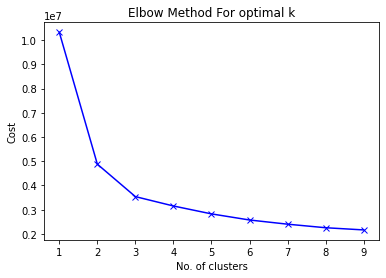

In [103]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
#     kproto = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kproto = KPrototypes(n_clusters=num_clusters, verbose=2, max_iter=20).fit(sub_data, categorical=[0,1,2,3,6]) 
#     kmode.fit_predict(data21_1)
    cost.append(kproto.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [104]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(sub_data, categorical=[0,1,2,3,6])      

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 27875, ncost: 3923589.505637117
Run: 1, iteration: 2/20, moves: 23332, ncost: 3620838.568863393
Run: 1, iteration: 3/20, moves: 10661, ncost: 3562272.749880466
Run: 1, iteration: 4/20, moves: 7364, ncost: 3542244.7081315587
Run: 1, iteration: 5/20, moves: 1762, ncost: 3540881.148323671
Run: 1, iteration: 6/20, moves: 209, ncost: 3540864.8779340144
Run: 1, iteration: 7/20, moves: 74, ncost: 3540858.5631264695
Run: 1, iteration: 8/20, moves: 0, ncost: 3540858.5631264695
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 41647, ncost: 3561551.965645771
Run: 2, iteration: 2/20, moves: 11298, ncost: 3541360.448842131
Run: 2, iteration: 3/20, moves: 1361, ncost: 3540865.7332848413
Run: 2, iteration: 4/20, moves: 117, ncost: 3540858.5631264695
Run: 2, iteration: 5/20, moves: 0, ncost: 3540858.5631264695
Init: initializing 

In [105]:
kproto.cluster_centroids_

array([['5.67989974359713', '2.163060701218634', '0486', 'BATTERY',
        'False', 'False', 'District 6'],
       ['5.59522163928246', '19.359712230215827', '0486', 'BATTERY',
        'False', 'False', 'District 6'],
       ['5.367477348593228', '11.486552217453506', '0820', 'THEFT',
        'False', 'False', 'District 11']], dtype='<U32')

In [106]:
# Check the iteration of the clusters created
kproto.n_iter_
# Check the cost of the clusters created
kproto.cost_

3540858.5631264695

In [107]:
# Add the cluster to the dataframe
sub_data['Cluster Labels'] = kproto.labels_
# sub_data['Segment'] = sub_data['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

In [108]:
sub_data['Cluster Labels']

6910067    2
6927871    0
6927960    0
6932002    1
6932007    1
          ..
7423480    2
7423481    1
7423482    0
7423483    0
7423484    2
Name: Cluster Labels, Length: 161283, dtype: uint16

In [109]:
len(sub_data['Cluster Labels'])

161283

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches((20, 10))
# scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# # produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(num=15),
#                     loc="lower left", title="Classes")
# ax.add_artist(legend1)

In [112]:
#print number of instances in each cluster
cluster1Size = 0
cluster2Size = 0
cluster3Size = 0
for i, row in sub_data.iterrows():
    if sub_data['Cluster Labels'][i] == 0:
        cluster1Size += 1
    elif sub_data['Cluster Labels'][i] == 1:
        cluster2Size += 1
    elif sub_data['Cluster Labels'][i] == 2:
        cluster3Size += 1
        
print('Cluster 1 size: ', cluster1Size)
print('Cluster 2 size: ', cluster2Size)
print('Cluster 3 size: ', cluster3Size)

Cluster 1 size:  34711
Cluster 2 size:  63662
Cluster 3 size:  62910


In [126]:
cluster1Size = 0
cluster2Size = 0
cluster3Size = 0

cluster1Iucrs = []
cluster1CrimeTypes = []
cluster1Arrests = []
cluster1DomesticTypes = []
cluster1Months = []
cluster1Hours = []
cluster1Districts = []
cluster2Iucrs = []
cluster2CrimeTypes = []
cluster2Arrests = []
cluster2DomesticTypes = []
cluster2Months = []
cluster2Hours = []
cluster2Districts = []
cluster3Iucrs = []
cluster3CrimeTypes = []
cluster3Arrests = []
cluster3DomesticTypes = []
cluster3Months = []
cluster3Hours = []
cluster3Districts = []

for i, row in sub_data.iterrows():
    if sub_data['Cluster Labels'][i] == 0:
        cluster1Size += 1
        
        if sub_data['IUCR'][i] not in cluster1Iucrs:
            cluster1Iucrs.append(sub_data['IUCR'][i]);
            
        if sub_data['Primary Type'][i] not in cluster1CrimeTypes:
            cluster1CrimeTypes.append(sub_data['Primary Type'][i])
        
        if sub_data['Arrest'][i] not in cluster1Arrests:
            cluster1Arrests.append(sub_data['Arrest'][i])
          
        if sub_data['Domestic'][i] not in cluster1DomesticTypes:
            cluster1DomesticTypes.append(sub_data['Domestic'][i])
        
        if sub_data['month'][i] not in cluster1Months:
            cluster1Months.append(sub_data['month'][i])
        
        if sub_data['hour'][i] not in cluster1Hours:
            cluster1Hours.append(sub_data['hour'][i])
        
        if sub_data['district'][i] not in cluster1Districts:
            cluster1Districts.append(sub_data['district'][i])
        
    elif sub_data['Cluster Labels'][i] == 1:
        cluster2Size += 1
        
        if sub_data['IUCR'][i] not in cluster2Iucrs:
            cluster2Iucrs.append(sub_data['IUCR'][i]);

        if sub_data['Primary Type'][i] not in cluster2CrimeTypes:
            cluster2CrimeTypes.append(sub_data['Primary Type'][i])

        if sub_data['Arrest'][i] not in cluster2Arrests:
            cluster2Arrests.append(sub_data['Arrest'][i])

        if sub_data['Domestic'][i] not in cluster2DomesticTypes:
            cluster2DomesticTypes.append(sub_data['Domestic'][i])

        if sub_data['month'][i] not in cluster2Months:
            cluster2Months.append(sub_data['month'][i])

        if sub_data['hour'][i] not in cluster2Hours:
            cluster2Hours.append(sub_data['hour'][i])

        if sub_data['district'][i] not in cluster2Districts:
            cluster2Districts.append(sub_data['district'][i])
        
    elif sub_data['Cluster Labels'][i] == 2:
        cluster3Size += 1
        
        if sub_data['IUCR'][i] not in cluster3Iucrs:
            cluster3Iucrs.append(sub_data['IUCR'][i]);

        if sub_data['Primary Type'][i] not in cluster3CrimeTypes:
            cluster3CrimeTypes.append(sub_data['Primary Type'][i])

        if sub_data['Arrest'][i] not in cluster3Arrests:
            cluster3Arrests.append(sub_data['Arrest'][i])

        if sub_data['Domestic'][i] not in cluster3DomesticTypes:
            cluster3DomesticTypes.append(sub_data['Domestic'][i])

        if sub_data['month'][i] not in cluster3Months:
            cluster3Months.append(sub_data['month'][i])

        if sub_data['hour'][i] not in cluster3Hours:
            cluster3Hours.append(sub_data['hour'][i])

        if sub_data['district'][i] not in cluster3Districts:
            cluster3Districts.append(sub_data['district'][i])
        
print('Cluster 1 IUCRs: ', cluster1Iucrs)
print('Cluster 1 Crimes: ', cluster1CrimeTypes)
print('Cluster 1 Arrests: ', cluster1Arrests)
print('Cluster 1 DomesticTypes: ', cluster1DomesticTypes)
print('Cluster 1 Months: ', cluster1Months)
print('Cluster 1 Hours: ', cluster1Hours)
print('Cluster 1 Districts: ', cluster1Districts)
print('------------------------------------------------------------------')

print('Cluster 2 IUCRs: ', cluster2Iucrs)
print('Cluster 2 Crimes: ', cluster2CrimeTypes)
print('Cluster 2 Arrests: ', cluster2Arrests)
print('Cluster 2 DomesticTypes: ', cluster2DomesticTypes)
print('Cluster 2 Months: ', cluster2Months)
print('Cluster 2 Hours: ', cluster2Hours)
print('Cluster 2 Districts: ', cluster2Districts)
print('------------------------------------------------------------------')

print('Cluster 3 IUCRs: ', cluster3Iucrs)
print('Cluster 3 Crimes: ', cluster3CrimeTypes)
print('Cluster 3 Arrests: ', cluster3Arrests)
print('Cluster 3 DomesticTypes: ', cluster3DomesticTypes)
print('Cluster 3 Months: ', cluster3Months)
print('Cluster 3 Hours: ', cluster3Hours)
print('Cluster 3 Districts: ', cluster3Districts)
print('------------------------------------------------------------------')

# f = open("kPrototypes_3_ClusterAnalysis.txt", "x")

# f.write('----------------------- Cluster 1 ----------------------------------')
# f.write(str(cluster1Iucrs) + '\n')
# f.write(str(cluster1CrimeTypes) + '\n')
# f.write(str(cluster1Arrests) + '\n')
# f.write(str(cluster1DomesticTypes) + '\n')
# f.write(str(cluster1Months) + '\n')
# f.write(str(cluster1Hours) + '\n')
# f.write(str(cluster1Districts) + '\n')
# f.write('\n\n\n')

# f.write('----------------------- Cluster 2 ----------------------------------')
# f.write(str(cluster2Iucrs) + '\n')
# f.write(str(cluster2CrimeTypes) + '\n')
# f.write(str(cluster2Arrests) + '\n')
# f.write(str(cluster2DomesticTypes) + '\n')
# f.write(str(cluster2Months) + '\n')
# f.write(str(cluster2Hours) + '\n')
# f.write(str(cluster2Districts) + '\n')
# f.write('\n\n\n')

# f.write('----------------------- Cluster 3 ----------------------------------')
# f.write(str(cluster3Iucrs) + '\n')
# f.write(str(cluster3CrimeTypes) + '\n')
# f.write(str(cluster3Arrests) + '\n')
# f.write(str(cluster3DomesticTypes) + '\n')
# f.write(str(cluster3Months) + '\n')
# f.write(str(cluster3Hours) + '\n')
# f.write(str(cluster3Districts) + '\n')

# f.close()

Cluster 1 IUCRs:  ['0820', '0486', '1360', '1310', '0325', '0860', '0610', '0460', '0910', '0110', '1320', '5002', '0620', '1154', '0870', '0810', '143A', '1330', '2825', '051A', '2826', '0497', '2820', '1210', '0560', '0320', '5011', '0496', '1477', '502R', '2093', '0498', '041A', '031A', '0890', '1130', '0930', '0630', '0917', '033A', '1020', '0580', '1750', '0484', '502P', '0281', '2022', '1153', '1512', '4387', '141A', '2026', '0420', '1152', '0330', '1585', '1110', '2027', '1305', '0650', '0454', '0470', '1220', '0520', '0326', '1790', '1365', '141B', '1811', '1563', '0475', '3800', '0430', '0461', '2250', '2028', '5001', '1345', '3710', '0584', '3731', '1150', '0495', '2017', '143B', '0313', '1812', '0453', '1122', '0266', '1479', '5000', '1480', '2021', '1540', '0583', '0895', '5007', '0880', '0920', '2032', '1780', '3960', '143C', '0340', '0850', '2830', '1242', '1751', '0530', '2024', '4310', '1562', '0485', '051B', '1155', '0554', '1350', '0265', '0545', '1710', '1156', '1754

In [130]:
len(cluster1CrimeTypes)

28

In [131]:
len(cluster2CrimeTypes)

29

In [132]:
len(cluster3CrimeTypes)

29

In [137]:
if 'NARCOTICS' in cluster1CrimeTypes:
    print('YES')

YES


In [138]:
for c2 in cluster2CrimeTypes:
    if c2 not in cluster1CrimeTypes:
        print(c2)

PUBLIC INDECENCY


In [ ]:
print('Cluster 1 IUCRs: ', cluster1Iucrs)
print('Cluster 1 Crimes: ', cluster1CrimeTypes)
print('Cluster 1 Arrests: ', cluster1Arrests)
print('Cluster 1 DomesticTypes: ', cluster1DomesticTypes)
print('Cluster 1 Months: ', cluster1Months)
print('Cluster 1 Hours: ', cluster1Hours)
print('Cluster 1 Districts: ', cluster1Districts)
print('------------------------------------------------------------------')

print('Cluster 2 IUCRs: ', cluster2Iucrs)
print('Cluster 2 Crimes: ', cluster2CrimeTypes)
print('Cluster 2 Arrests: ', cluster2Arrests)
print('Cluster 2 DomesticTypes: ', cluster2DomesticTypes)
print('Cluster 2 Months: ', cluster2Months)
print('Cluster 2 Hours: ', cluster2Hours)
print('Cluster 2 Districts: ', cluster2Districts)
print('------------------------------------------------------------------')

print('Cluster 3 IUCRs: ', cluster3Iucrs)
print('Cluster 3 Crimes: ', cluster3CrimeTypes)
print('Cluster 3 Arrests: ', cluster3Arrests)
print('Cluster 3 DomesticTypes: ', cluster3DomesticTypes)
print('Cluster 3 Months: ', cluster3Months)
print('Cluster 3 Hours: ', cluster3Hours)
print('Cluster 3 Districts: ', cluster3Districts)
print('------------------------------------------------------------------')

In [122]:
cluster1Iucrs

['0820',
 '0486',
 '1360',
 '1310',
 '0325',
 '0860',
 '0610',
 '0460',
 '0910',
 '0110',
 '1320',
 '5002',
 '0620',
 '1154',
 '0870',
 '0810',
 '143A',
 '1330',
 '2825',
 '051A',
 '2826',
 '0497',
 '2820',
 '1210',
 '0560',
 '0320',
 '5011',
 '0496',
 '1477',
 '502R',
 '2093',
 '0498',
 '041A',
 '031A',
 '0890',
 '1130',
 '0930',
 '0630',
 '0917',
 '033A',
 '1020',
 '0580',
 '1750',
 '0484',
 '502P',
 '0281',
 '2022',
 '1153',
 '1512',
 '4387',
 '141A',
 '2026',
 '0420',
 '1152',
 '0330',
 '1585',
 '1110',
 '2027',
 '1305',
 '0650',
 '0454',
 '0470',
 '1220',
 '0520',
 '0326',
 '1790',
 '1365',
 '141B',
 '1811',
 '1563',
 '0475',
 '3800',
 '0430',
 '0461',
 '2250',
 '2028',
 '5001',
 '1345',
 '3710',
 '0584',
 '3731',
 '1150',
 '0495',
 '2017',
 '143B',
 '0313',
 '1812',
 '0453',
 '1122',
 '0266',
 '1479',
 '5000',
 '1480',
 '2021',
 '1540',
 '0583',
 '0895',
 '5007',
 '0880',
 '0920',
 '2032',
 '1780',
 '3960',
 '143C',
 '0340',
 '0850',
 '2830',
 '1242',
 '1751',
 '0530',
 '2024',
 

In [119]:
str(cluster1Iucrs)

"['0820', '0486', '1360', '1310', '0820', '0325', '0860', '0610', '0460', '0910', '0110', '1320', '1310', '0820', '1320', '1320', '5002', '0110', '0620', '0820', '1154', '0110', '0870', '0820', '1310', '0810', '0460', '143A', '0910', '0810', '143A', '1330', '0820', '143A', '2825', '0486', '0810', '1154', '2825', '1154', '0486', '0486', '051A', '143A', '1310', '0486', '2826', '1360', '0610', '1154', '2826', '0497', '0486', '143A', '0486', '0460', '0820', '0486', '0486', '2820', '1210', '0560', '1310', '0486', '0486', '1320', '0320', '0610', '0486', '0810', '5011', '0610', '1320', '1154', '1154', '0496', '1477', '502R', '0910', '2820', '0460', '0486', '143A', '0610', '2093', '1320', '0460', '0610', '0498', '0486', '051A', '1320', '1330', '0486', '0486', '1154', '0486', '0486', '1320', '0610', '041A', '143A', '1310', '031A', '0890', '1320', '1320', '0486', '0486', '1154', '1130', '0810', '0810', '1320', '0486', '0610', '1320', '0930', '0630', '1320', '0820', '143A', '0917', '033A', '1310'

In [123]:
str(cluster1Iucrs)

"['0820', '0486', '1360', '1310', '0325', '0860', '0610', '0460', '0910', '0110', '1320', '5002', '0620', '1154', '0870', '0810', '143A', '1330', '2825', '051A', '2826', '0497', '2820', '1210', '0560', '0320', '5011', '0496', '1477', '502R', '2093', '0498', '041A', '031A', '0890', '1130', '0930', '0630', '0917', '033A', '1020', '0580', '1750', '0484', '502P', '0281', '2022', '1153', '1512', '4387', '141A', '2026', '0420', '1152', '0330', '1585', '1110', '2027', '1305', '0650', '0454', '0470', '1220', '0520', '0326', '1790', '1365', '141B', '1811', '1563', '0475', '3800', '0430', '0461', '2250', '2028', '5001', '1345', '3710', '0584', '3731', '1150', '0495', '2017', '143B', '0313', '1812', '0453', '1122', '0266', '1479', '5000', '1480', '2021', '1540', '0583', '0895', '5007', '0880', '0920', '2032', '1780', '3960', '143C', '0340', '0850', '2830', '1242', '1751', '0530', '2024', '4310', '1562', '0485', '051B', '1155', '0554', '1350', '0265', '0545', '1710', '1156', '1754', '4388', '5131'

In [127]:
sub_data

,IUCR,Primary Type,Arrest,Domestic,month,hour,district,Cluster Labels
6910067,0486,BATTERY,False,True,1,13,District 7,2
6927871,0820,THEFT,False,False,1,6,District 6,0
6927960,0486,BATTERY,False,True,1,0,District 15,0
6932002,2022,NARCOTICS,True,False,1,20,District 7,1
6932007,0110,HOMICIDE,False,False,1,20,District 3,1
...,...,...,...,...,...,...,...,...
7423480,0460,BATTERY,False,False,10,11,District 25,2
7423481,1365,CRIMINAL TRESPASS,False,False,10,16,District 8,1
7423482,1154,DECEPTIVE PRACTICE,False,False,1,0,District 5,0
7423483,0560,ASSAULT,False,True,10,0,District 8,0


In [128]:
sub_data.columns

Index(['IUCR', 'Primary Type', 'Arrest', 'Domestic', 'month', 'hour',
       'district', 'Cluster Labels'],
      dtype='object')

In [ ]:
sub_data = data21['Primary Type', 'Arrest', 'month', 'district']

In [90]:
data21.columns

Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location', 'date', 'month', 'time', 'hour',
       'district'],
      dtype='object')

In [ ]:
data21_1.columns

In [91]:
data21_1 = data21.drop(columns=['ID', 'Date', 'Block', 'Description', 'Location Description', 'Domestic', 'Ward', 'Community Area', 'Year', 'Location', 'date', 'time', 'month', 'hour'])

In [92]:
data21_1

,IUCR,Primary Type,Arrest,District,month,hour,district
6910067,0486,BATTERY,False,7.0,1,13,District 7
6927871,0820,THEFT,False,6.0,1,6,District 6
6927960,0486,BATTERY,False,15.0,1,0,District 15
6932002,2022,NARCOTICS,True,7.0,1,20,District 7
6932007,0110,HOMICIDE,False,3.0,1,20,District 3
...,...,...,...,...,...,...,...
7423480,0460,BATTERY,False,25.0,10,11,District 25
7423481,1365,CRIMINAL TRESPASS,False,8.0,10,16,District 8
7423482,1154,DECEPTIVE PRACTICE,False,5.0,1,0,District 5
7423483,0560,ASSAULT,False,8.0,10,0,District 8


In [93]:
data21_1.shape

(161283, 7)

In [94]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data21_1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 887971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 887971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 887971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 887971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 887971.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9561, cost: 840743.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6660, cost: 825168.0
Run 2, iteration

KeyboardInterrupt: 

In [ ]:
#Interpreting the elbow as 6
# Building the model with 6 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data)
clusters

In [ ]:
sub_data['Cluster'] = clusters
sub_data.head()

In [ ]:
for c in range(0, ):
    districts = []
    crimes = []
    
    for i, row in sub_data.iterrows():
        if row['Clusters'] == c:
            if row['district'] not in districts:
                districts.append(row['district'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts are: ", districts)
    print("Crime types are: ", crimes)

In [7]:
data21['date'][:10], data21['month'][:10], data21['hour'][:10], data21['time'][:10]

(6910067    2021-01-03
 6927871    2021-01-03
 6927960    2021-01-03
 6932002    2021-01-03
 6932007    2021-01-03
 6932012    2021-01-03
 6932016    2021-01-03
 6940555    2021-01-03
 6940556    2021-01-03
 6940573    2021-01-03
 Name: date, dtype: object,
 6910067    1
 6927871    1
 6927960    1
 6932002    1
 6932007    1
 6932012    1
 6932016    1
 6940555    1
 6940556    1
 6940573    1
 Name: month, dtype: int64,
 6910067    13
 6927871     6
 6927960     0
 6932002    20
 6932007    20
 6932012     8
 6932016    16
 6940555    23
 6940556    22
 6940573     1
 Name: hour, dtype: int64,
 6910067    13:23:00
 6927871    06:59:00
 6927960    00:20:00
 6932002    20:47:00
 6932007    20:09:00
 6932012    08:54:00
 6932016    16:30:00
 6940555    23:47:00
 6940556    22:30:00
 6940573    01:00:00
 Name: time, dtype: object)

In [7]:
data21['district'] = "District " + (data21['District'].astype(int)).astype(str)
data21['district'][:10]

6910067     District 7
6927871     District 6
6927960    District 15
6932002     District 7
6932007     District 3
6932012     District 4
6932016    District 12
6940555     District 3
6940556    District 24
6940573     District 2
Name: district, dtype: object

In [24]:
data21['district'].unique()

array(['District 7', 'District 6', 'District 15', 'District 3',
       'District 4', 'District 12', 'District 24', 'District 2',
       'District 10', 'District 14', 'District 22', 'District 18',
       'District 5', 'District 11', 'District 9', 'District 20',
       'District 25', 'District 8', 'District 17', 'District 19',
       'District 16', 'District 1', 'District 31'], dtype=object)

In [25]:
data21['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'HOMICIDE', 'ASSAULT',
       'WEAPONS VIOLATION', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'PROSTITUTION',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'GAMBLING', 'OTHER NARCOTIC VIOLATION'], dtype=object)

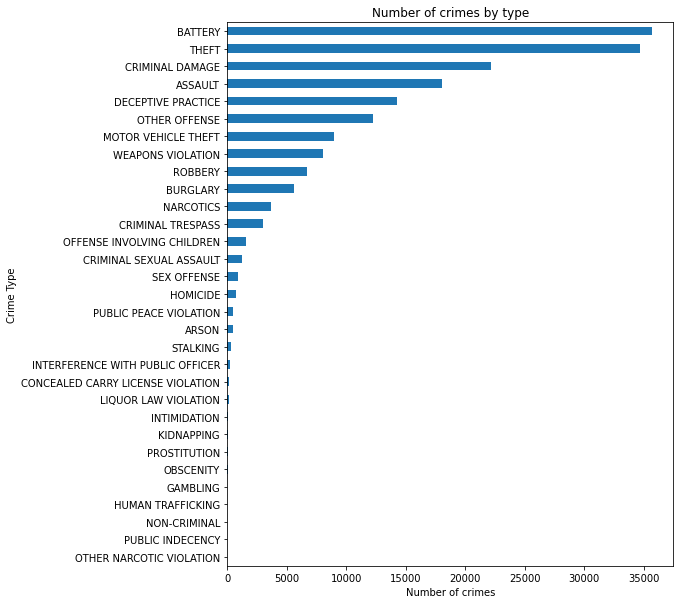

In [34]:
plt.figure(figsize=(8,10))
data21.groupby([data21['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [13]:
#We will use the 10 most common crime types

top10Crimes = ['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
              'WEAPONS VIOLATION', 'ROBBERY', 'BURGLARY']

In [14]:
sub_data = data21[['Primary Type', 'district']]

In [16]:
sub_data = sub_data[sub_data['Primary Type'].isin(top10Crimes)]

In [17]:
sub_data.shape

(149102, 2)

In [18]:
sub_data.shape

(149102, 2)

In [19]:
sub_data['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'ASSAULT', 'WEAPONS VIOLATION',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE'], dtype=object)

In [20]:
len(sub_data)

149102

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 285860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 285860.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8445, cost: 245313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1158, cost: 264087.0
Init: initializi

Run 4, iteration: 2/100, moves: 1458, cost: 157271.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2118, cost: 162754.0
Best run was number 4
Running for 12 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38856, cost: 157953.0
Run 1, iteration: 2/100, moves: 0, cost: 157953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 19126, cost: 156553.0
Run 2, iteration: 2/100, moves: 1504, cost: 156553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7257, cost: 167772.0
Run 3, iteration: 2/100, moves: 3, cost: 167772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11693, cost: 163300.0
Run 4, iteration: 2/100, moves: 8150, cost: 163534.0
Init: initializing centroid

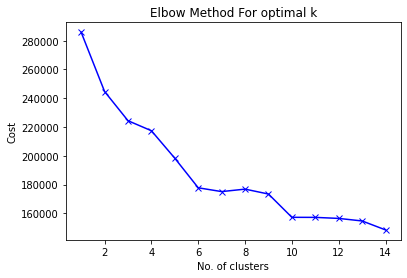

In [42]:
cost = []
K = range(1,15)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [21]:
#Interpreting the elbow as 6
# Building the model with 6 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27263, cost: 175447.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 15839, cost: 188005.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5555, cost: 172379.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 35439, cost: 176240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13906, cost: 186622.0
Best run was number 3


array([0, 1, 0, ..., 5, 3, 4], dtype=uint16)

In [27]:
# silhouetteScore = metrics.silhouette_score(sub_data, clusters, metric='hamming')
silhouetteScore = metrics.silhouette_score(sub_data, clusters, metric='euclidean')

ValueError: could not convert string to float: 'BATTERY'

In [23]:
from sklearn import metrics

In [48]:
#Interpreting the elbow as 6
# Building the model with 6 clusters
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8517, cost: 191602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13678, cost: 191090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10313, cost: 195427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26794, cost: 201028.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 43665, cost: 195855.0
Best run was number 2


array([5, 2, 0, ..., 0, 4, 3], dtype=uint16)

In [80]:
sub_data['Cluster'] = clusters
sub_data.head()

/tmp/ipykernel_9250/317270298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['Cluster'] = clusters


,Primary Type,district,Cluster
6910067,BATTERY,District 7,5
6927871,THEFT,District 6,0
6927960,BATTERY,District 15,5
6932002,NARCOTICS,District 7,0
6932007,HOMICIDE,District 3,0


In [61]:
sub_data['Clusters']

6909995    5
6927795    2
6927884    0
6931935    1
6931939    3
          ..
7442160    2
7442161    3
7442162    0
7442163    4
7442164    3
Name: Clusters, Length: 166314, dtype: uint16

In [70]:
for c in range(0, 6):
    districts = []
    crimes = []
    
    for i, row in sub_data.iterrows():
        if row['Clusters'] == c:
            if row['district'] not in districts:
                districts.append(row['district'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts are: ", districts)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Districts are:  ['District 15', 'District 24', 'District 22', 'District 6', 'District 4', 'District 5', 'District 12', 'District 9', 'District 18', 'District 11', 'District 8', 'District 25', 'District 20', 'District 2', 'District 3', 'District 16', 'District 19', 'District 14', 'District 10', 'District 17', 'District 1', 'District 31']
Crime types are:  ['BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'ASSAULT']

 *************************************
In cluster 2:
Districts are:  ['District 4', 'District 15', 'District 11', 'District 9', 'District 5', 'District 7', 'District 20', 'District 6', 'District 8', 'District 25', 'District 12', 'District 10', 'District 3', 'District 14', 'District 1', 'District 2', 'District 18', 'District 22', 'District 16', 'District 17', 'District 19', 'District 31']
Crime types are:  ['ASSAULT', 'MOTOR VEH

In [11]:
sub_data1 = data21[['Primary Type', 'district', 'hour']]
sub_data1 = sub_data1[sub_data1['Primary Type'].isin(top10Crimes)]

In [12]:
sub_data1[:10]

,Primary Type,district,hour
6910067,BATTERY,District 7,13
6927871,THEFT,District 6,6
6927960,BATTERY,District 15,0
6932012,ASSAULT,District 4,8
6932016,THEFT,District 12,16
6940555,WEAPONS VIOLATION,District 3,23
6940556,CRIMINAL DAMAGE,District 24,22
6940577,CRIMINAL DAMAGE,District 10,21
6940805,CRIMINAL DAMAGE,District 14,5
6955850,THEFT,District 22,3


Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 441037.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 441037.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7018, cost: 413043.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12238, cost: 401234.0
Init: initializ

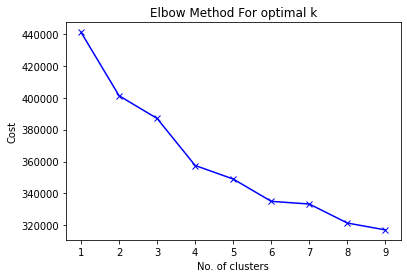

In [74]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [13]:
#Interpreting the elbow as 4
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data1)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13829, cost: 342156.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8823, cost: 322764.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6490, cost: 332599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1288, cost: 340669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6588, cost: 340344.0
Best run was number 2


array([2, 2, 2, ..., 2, 2, 0], dtype=uint16)

In [14]:
sub_data1['Cluster'] = clusters
sub_data1.head()

,Primary Type,district,hour,Cluster
6910067,BATTERY,District 7,13,2
6927871,THEFT,District 6,6,2
6927960,BATTERY,District 15,0,2
6932012,ASSAULT,District 4,8,3
6932016,THEFT,District 12,16,3


In [15]:
sub_data1['Cluster']

6910067    2
6927871    2
6927960    2
6932012    3
6932016    3
          ..
7423479    1
7423480    2
7423482    2
7423483    2
7423484    0
Name: Cluster, Length: 149102, dtype: uint16

In [16]:
for c in range(0, 4):
    districts = defaultdict(dict)
    crimes = []
    hours = []
    
    for i, row in sub_data1.iterrows():
        if row['Cluster'] == c:
            if districts[row['district']]:
                hrs = districts[row['district']].split(",")

                if str(row['hour']) not in hrs:
                    districts[row['district']] += ',%s' %str(row['hour'])
            else:
                districts[row['district']] = '%s' %str(row['hour'])
                
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts are: ", districts)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Districts are:  defaultdict(<class 'dict'>, {'District 3': '23,14,10,16,21,20,12,9,15,18,11,13,17,4,7,0,8,1,6,22,2,3,19,5', 'District 24': '22,16,12,15,20,18,17,11,2,19,0,14,4,7,10,13,21,3,1,9,23,5,6,8', 'District 10': '21,14,13,10,4,6,23,3,11,2,1,22,17,16,9,12,18,15,20,0,7,8,19,5', 'District 14': '5,11,15,7,20,10,12,19,21,9,18,13,16,23,22,17,14,1,3,2,8,4,6,0', 'District 15': '14,20,23,21,7,17,0,3,16,4,10,5,13,22,9,12,11,15,18,1,19,8,2,6', 'District 22': '11,9,22,13,18,15,20,16,21,17,6,7,12,1,10,14,0,23,5,2,8,4,3,19', 'District 4': '4,12,20,18,14,5,23,16,6,22,1,11,9,17,21,7,0,3,15,2,10,13,8,19', 'District 9': '17,20,22,10,21,3,23,8,15,9,7,14,2,4,1,11,16,0,6,18,12,13,19,5', 'District 20': '9,11,20,16,13,12,5,0,10,22,17,3,15,6,14,1,21,8,18,4,23,7,19,2', 'District 25': '3,0,6,20,16,2,15,9,19,1,4,13,18,23,21,10,5,7,12,17,14,22,11', 'District 5': '15,0,7,13,16,18,17,21,10,23,20,2,12,14,11,22,9,4,19,6,8,3,5,1', 'District 18': '16,12,20,14

In [81]:
sub_data2 = data21[['Primary Type', 'month']]
# sub_data2 = sub_data2[sub_data2['Primary Type'].isin(top10Crimes)]

In [86]:
sub_data2

,Primary Type,month
6910067,BATTERY,January
6927871,THEFT,January
6927960,BATTERY,January
6932002,NARCOTICS,January
6932007,HOMICIDE,January
...,...,...
7423480,BATTERY,October
7423481,CRIMINAL TRESPASS,October
7423482,DECEPTIVE PRACTICE,January
7423483,ASSAULT,October


In [83]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, row in sub_data2.iterrows():
    sub_data2['month'][i] = months[int(sub_data2['month'][i]) - 1]

/tmp/ipykernel_9250/1475295580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2['month'][i] = months[int(sub_data2['month'][i]) - 1]
/home/aomkar/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/aomkar/.local/lib/python3.8/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [84]:
sub_data2['month'].unique()

array(['January', 'February', 'April', 'March', 'May', 'June', 'July',
       'August', 'September', 'October'], dtype=object)

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 271325.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3392, cost: 233821.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12090, cost: 229557.0
Init: initializ

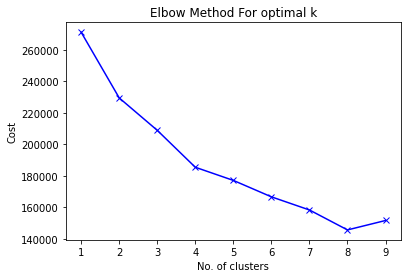

In [85]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [87]:
#Interpreting the elbow as 4
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9452, cost: 209504.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10946, cost: 210486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 16846, cost: 195476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13305, cost: 205915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13787, cost: 197158.0
Best run was number 3


array([0, 2, 0, ..., 2, 1, 0], dtype=uint16)

In [88]:
sub_data2['Cluster'] = clusters
sub_data2.head()

/tmp/ipykernel_9250/1499757117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2['Cluster'] = clusters


,Primary Type,month,Cluster
6910067,BATTERY,January,0
6927871,THEFT,January,2
6927960,BATTERY,January,0
6932002,NARCOTICS,January,2
6932007,HOMICIDE,January,2


In [89]:
for c in range(0, 4):
    months = []
    crimes = []
    
    for i, row in sub_data2.iterrows():
        if row['Cluster'] == c:
            if row['month'] not in months:
                months.append(row['month'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Months are: ", months)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Months are:  ['January', 'February', 'April', 'March', 'May', 'June', 'July', 'August', 'September', 'October']
Crime types are:  ['BATTERY', 'SEX OFFENSE', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'OTHER OFFENSE', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'PUBLIC PEACE VIOLATION', 'BURGLARY', 'NARCOTICS', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN', 'INTERFERENCE WITH PUBLIC OFFICER', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'LIQUOR LAW VIOLATION', 'ARSON', 'STALKING', 'PROSTITUTION', 'OBSCENITY', 'INTIMIDATION', 'HUMAN TRAFFICKING', 'NON-CRIMINAL', 'PUBLIC INDECENCY', 'GAMBLING', 'OTHER NARCOTIC VIOLATION', 'DECEPTIVE PRACTICE', 'ASSAULT']

 *************************************
In cluster 2:
Months are:  ['January', 'February', 'April', 'March', 'May', 'June', 'July', 'August', 'October']
Crime types are:  ['ASSAULT', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'THEFT', 'CRIMINAL DAMAGE',

In [113]:
sub_data2 = data21[['Primary Type', 'month']]
sub_data2 = sub_data2[sub_data2['Primary Type'].isin(top10Crimes)]

In [114]:
sub_data2.head()

,Primary Type,month
6909995,BATTERY,1
6927795,THEFT,1
6927884,BATTERY,1
6931935,ASSAULT,1
6931939,THEFT,1


In [115]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, row in sub_data2.iterrows():
    sub_data2['month'][i] = months[int(sub_data2['month'][i]) - 1]

c:\python 3.9\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [117]:
sub_data2['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November'], dtype=object)

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 279269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 279269.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1440, cost: 260599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4538, cost: 236349.0
Init: initializi

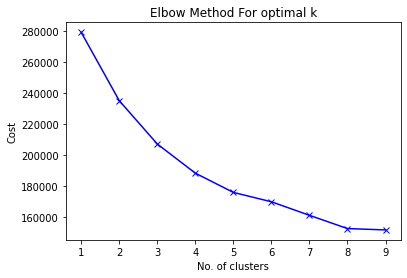

In [118]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [119]:
#Interpreting the elbow as 4
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9965, cost: 202400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14700, cost: 202908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38509, cost: 198277.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 201029.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13222, cost: 193143.0
Best run was number 5


array([0, 1, 0, ..., 0, 0, 1], dtype=uint16)

In [120]:
sub_data2['Cluster'] = clusters
sub_data2.head()

,Primary Type,month,Cluster
6909995,BATTERY,January,0
6927795,THEFT,January,1
6927884,BATTERY,January,0
6931935,ASSAULT,January,0
6931939,THEFT,January,1


In [122]:
sub_data2['Cluster']

6909995    0
6927795    1
6927884    0
6931935    0
6931939    1
          ..
7442160    2
7442161    1
7442162    0
7442163    0
7442164    1
Name: Cluster, Length: 166314, dtype: uint16

In [123]:
for c in range(0, 4):
    months = []
    crimes = []
    
    for i, row in sub_data2.iterrows():
        if row['Cluster'] == c:
            if row['month'] not in months:
                months.append(row['month'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Months are: ", months)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Months are:  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
Crime types are:  ['BATTERY', 'ASSAULT', 'WEAPONS VIOLATION', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE', 'THEFT', 'OTHER OFFENSE']

 *************************************
In cluster 2:
Months are:  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'September', 'October', 'November']
Crime types are:  ['THEFT', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'ASSAULT', 'DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'ROBBERY']

 *************************************
In cluster 3:
Months are:  ['January', 'February', 'March', 'April', 'May', 'July', 'September', 'October', 'November']
Crime types are:  ['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'ASSAULT', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'OTHER OFFENSE', 'ROBBERY']


The above clustering maybe bcoz - the crimes considered cover almost 95% of the dataset and hence must be occuring during all the months...

In [68]:
sub_data2_1 = data21[['Primary Type', 'month']]

In [69]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, row in sub_data2_1.iterrows():
    sub_data2_1['month'][i] = months[int(sub_data2_1['month'][i]) - 1]

/tmp/ipykernel_9250/3862614851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2_1['month'][i] = months[int(sub_data2_1['month'][i]) - 1]
/home/aomkar/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/aomkar/.local/lib/python3.8/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [70]:
sub_data2_1['month'].unique()

array(['January', 'February', 'April', 'March', 'May', 'June', 'July',
       'August', 'September', 'October'], dtype=object)

Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 271325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 271325.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6562, cost: 249334.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 256990.0
Init: initializing 

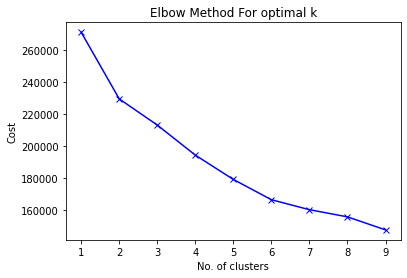

In [71]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data2_1)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [ ]:
# #We will use the 10 most common crime types

# top10Crimes = ['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE', 
#               'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
#               'WEAPONS VIOLATION', 'ROBBERY', 'BURGLARY']

In [24]:
sub_data3 = data21[['Primary Type', 'district', 'hour']]
sub_data3 = sub_data3[sub_data3['Primary Type'].isin(top10Crimes)]

In [29]:
sub_data3 = sub_data3.drop(columns=['Primary Type'])

In [30]:
sub_data3[:10]

,district,hour
6910067,District 7,13
6927871,District 6,6
6927960,District 15,0
6932012,District 4,8
6932016,District 12,16
6940555,District 3,23
6940556,District 24,22
6940577,District 10,21
6940805,District 14,5
6955850,District 22,3


Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 278283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 278283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 278283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 278283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 278283.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1613, cost: 265415.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1303, cost: 268058.0
Init: initializi

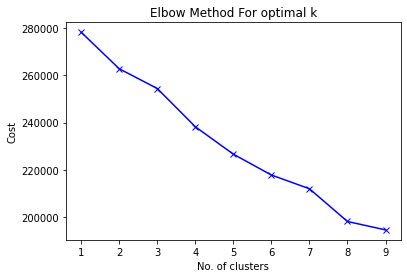

In [31]:
# TRY TILL 15 later

cost = []
K = range(1,10)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data3)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [32]:
kmode = KModes(n_clusters=8, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data3)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8859, cost: 201164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17975, cost: 210019.0
Run 2, iteration: 2/100, moves: 7127, cost: 210019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17433, cost: 208504.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9337, cost: 209087.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9438, cost: 215151.0
Run 5, iteration: 2/100, moves: 0, cost: 215151.0
Best run was number 1


array([5, 0, 4, ..., 4, 4, 6], dtype=uint16)

In [36]:
sub_data3['Cluster'] = clusters
sub_data3.head()

,district,hour,Cluster
6910067,District 7,13,5
6927871,District 6,6,0
6927960,District 15,0,4
6932012,District 4,8,4
6932016,District 12,16,0


In [37]:
for c in range(0, 8):
    districts = defaultdict(dict)
#     hours = []
    
    for i, row in sub_data3.iterrows():
        if row['Cluster'] == c:
            if districts[row['district']]:
                hrs = districts[row['district']].split(",")

                if str(row['hour']) not in hrs:
                    districts[row['district']] += ',%s' %str(row['hour'])
            else:
                districts[row['district']] = '%s' %str(row['hour'])
                
#             if row['Primary Type'] not in crimes:
#                 crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts and time data from clustering is: ", districts)
#     print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Districts and time data from clustering is:  defaultdict(<class 'dict'>, {'District 6': '6,10,12,15,9,20,16,0,11,7,17,18,2,1,19,23,22,3,5,8,14,21,4', 'District 12': '16,2,9,22,20,3,7,11,18,8,14,1,17,21,5,4,6', 'District 24': '22,16,9,18,8,17,20,1,4,6,11,2,14,7,21,3,5', 'District 10': '21,18,14,16,17,3,4,11,6,2,22,1,9,8,20,5,7', 'District 22': '3,11,9,22,18,8,20,16,21,17,2,6,7,1,14,5,4', 'District 15': '14,20,22,11,21,2,8,7,17,18,3,4,16,5,9,1,6', 'District 9': '17,20,22,21,3,8,9,7,14,2,4,1,11,16,6,18,5', 'District 20': '9,11,17,20,16,5,2,22,14,18,6,4,3,1,7,21,8', 'District 25': '3,6,14,16,11,20,21,17,1,18,4,2,22,8,9,7,5', 'District 2': '8,6,1,18,16,21,2,9,14,11,4,17,22,3,7,20,5', 'District 11': '17', 'District 8': '5,20,14,17,22,8,21,7,9,1,3,18,16,11,6,4,2', 'District 17': '14,20,16,2,1,9,5,21,7,17,8,4,3,6,22,11,18', 'District 5': '7,17,16,3,18,4,21,1,14,2,20,11,8,22,9,5,6', 'District 19': '16,18,21,17,14,11,5,1,22,6,20,9,8,3,7,2,4',

In [35]:
# TRY
# Arrest vs Crime
# Arrest vs District

In [38]:
sub_data4 = data21[['Primary Type', 'Arrest']]
sub_data4 = sub_data4[sub_data4['Primary Type'].isin(top10Crimes)]

In [39]:
sub_data4

,Primary Type,Arrest
6910067,BATTERY,False
6927871,THEFT,False
6927960,BATTERY,False
6932012,ASSAULT,False
6932016,THEFT,True
...,...,...
7423479,OTHER OFFENSE,False
7423480,BATTERY,False
7423482,DECEPTIVE PRACTICE,False
7423483,ASSAULT,False


Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 131116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 131116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 131116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 131116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 131116.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1876, cost: 115042.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 114879.0
Init: initializing 

Run 4, iteration: 1/100, moves: 34879, cost: 18034.0
Run 4, iteration: 2/100, moves: 9863, cost: 18034.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 62377, cost: 32607.0
Run 5, iteration: 2/100, moves: 7359, cost: 32607.0
Best run was number 4
Running for 12 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20313, cost: 24465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 20390, cost: 26609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 37864, cost: 22773.0
Run 3, iteration: 2/100, moves: 2726, cost: 22773.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17513, cost: 23966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


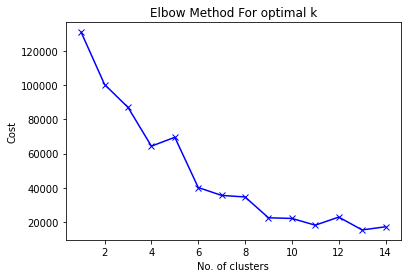

In [40]:
# TRY TILL 15 later

cost = []
K = range(1,15)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data4)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [41]:
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data4)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 67928.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 54927.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 25676, cost: 54927.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8739, cost: 71143.0
Run 4, iteration: 2/100, moves: 0, cost: 71143.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2727, cost: 57623.0
Best run was number 2


array([4, 2, 4, ..., 5, 1, 1], dtype=uint16)

In [43]:
sub_data4['Cluster'] = clusters
sub_data4.head()

,Primary Type,Arrest,Cluster
6910067,BATTERY,False,4
6927871,THEFT,False,2
6927960,BATTERY,False,4
6932012,ASSAULT,False,1
6932016,THEFT,True,0


In [45]:
for c in range(0, 6):
    arrests = []
    crimes = []
    
    for i, row in sub_data4.iterrows():
        if row['Cluster'] == c:
            if row['Arrest'] not in arrests:
                arrests.append(row['Arrest'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Arrests are: ", arrests)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Arrests are:  [True, False]
Crime types are:  ['THEFT', 'WEAPONS VIOLATION', 'BATTERY', 'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'BURGLARY', 'DECEPTIVE PRACTICE']

 *************************************
In cluster 2:
Arrests are:  [False]
Crime types are:  ['ASSAULT', 'CRIMINAL DAMAGE', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE']

 *************************************
In cluster 3:
Arrests are:  [False]
Crime types are:  ['THEFT']

 *************************************
In cluster 4:
Arrests are:  []
Crime types are:  []

 *************************************
In cluster 5:
Arrests are:  [False]
Crime types are:  ['BATTERY']

 *************************************
In cluster 6:
Arrests are:  [False]
Crime types are:  ['DECEPTIVE PRACTICE']


In [46]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data4)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 181099.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16973, cost: 151900.0
Run 2, iteration: 2/100, moves: 97, cost: 151900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 120465.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2727, cost: 80929.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17069, cost: 158736.0
Run 5, iteration: 2/100, moves: 1, cost: 158736.0
Best run was number 4


array([1, 3, 1, ..., 0, 0, 0], dtype=uint16)

In [47]:
sub_data4['Cluster'] = clusters
sub_data4.head()

,Primary Type,Arrest,Cluster
6910067,BATTERY,False,1
6927871,THEFT,False,3
6927960,BATTERY,False,1
6932012,ASSAULT,False,0
6932016,THEFT,True,2


In [48]:
for c in range(0, 4):
    arrests = []
    crimes = []
    
    for i, row in sub_data4.iterrows():
        if row['Cluster'] == c:
            if row['Arrest'] not in arrests:
                arrests.append(row['Arrest'])
            if row['Primary Type'] not in crimes:
                crimes.append(row['Primary Type'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Arrests are: ", arrests)
    print("Crime types are: ", crimes)


 *************************************
In cluster 1:
Arrests are:  [False]
Crime types are:  ['ASSAULT', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE']

 *************************************
In cluster 2:
Arrests are:  [False]
Crime types are:  ['BATTERY']

 *************************************
In cluster 3:
Arrests are:  [True, False]
Crime types are:  ['THEFT', 'WEAPONS VIOLATION', 'BATTERY', 'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'BURGLARY', 'DECEPTIVE PRACTICE']

 *************************************
In cluster 4:
Arrests are:  [False]
Crime types are:  ['THEFT']


In [58]:
sub_data5 = data21[['Primary Type', 'district', 'Arrest']]
sub_data5 = sub_data5[sub_data5['Primary Type'].isin(top10Crimes)]

In [60]:
sub_data5

,Primary Type,district,Arrest
6910067,BATTERY,District 7,False
6927871,THEFT,District 6,False
6927960,BATTERY,District 15,False
6932012,ASSAULT,District 4,False
6932016,THEFT,District 12,True
...,...,...,...
7423479,OTHER OFFENSE,District 8,False
7423480,BATTERY,District 25,False
7423482,DECEPTIVE PRACTICE,District 5,False
7423483,ASSAULT,District 8,False


In [61]:
sub_data5 = sub_data5.drop(columns=['Primary Type'])

In [62]:
sub_data5

,district,Arrest
6910067,District 7,False
6927871,District 6,False
6927960,District 15,False
6932012,District 4,False
6932016,District 12,True
...,...,...
7423479,District 8,False
7423480,District 25,False
7423482,District 5,False
7423483,District 8,False


Running for 1 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 153448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 153448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 153448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 153448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 153448.0
Best run was number 1
Running for 2 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 144694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 139631.0
Init: initializing cen

Starting iterations...
Run 2, iteration: 1/100, moves: 7392, cost: 90188.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22253, cost: 73762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4994, cost: 91514.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 86216, cost: 83709.0
Run 5, iteration: 2/100, moves: 0, cost: 83709.0
Best run was number 3
Running for 13 clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19427, cost: 70017.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12887, cost: 74429.0
Run 2, iteration: 2/100, moves: 5972, cost: 74429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22

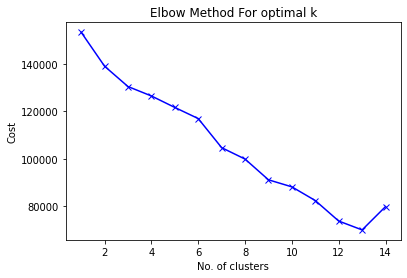

In [63]:
# TRY TILL 15 later

cost = []
K = range(1,15)
for num_clusters in list(K):
    print("Running for %d clusters" % num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(sub_data4)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For optimal k')
plt.show()

In [64]:
kmode = KModes(n_clusters=7, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(sub_data5)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4925, cost: 113673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 695, cost: 109533.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9020, cost: 111704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 115286.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 938, cost: 110505.0
Best run was number 2


array([6, 1, 0, ..., 0, 0, 2], dtype=uint16)

In [65]:
sub_data5['Cluster'] = clusters
sub_data5.head()

,district,Arrest,Cluster
6910067,District 7,False,6
6927871,District 6,False,1
6927960,District 15,False,0
6932012,District 4,False,0
6932016,District 12,True,4


In [67]:
for c in range(0, 7):
    districts = []
    arrests = []
    
    for i, row in sub_data5.iterrows():
        if row['Cluster'] == c:
            if row['district'] not in districts:
                districts.append(row['district'])
            if row['Arrest'] not in arrests:
                arrests.append(row['Arrest'])
    
    print("\n *************************************")
    print("In cluster %d:" %(c + 1))
    print("Districts are: ", districts)
    print("Arrests are: ", arrests)


 *************************************
In cluster 1:
Districts are:  ['District 15', 'District 4', 'District 3', 'District 24', 'District 22', 'District 18', 'District 5', 'District 11', 'District 9', 'District 20', 'District 25', 'District 2', 'District 12', 'District 8', 'District 19', 'District 16', 'District 1', 'District 31']
Arrests are:  [False, True]

 *************************************
In cluster 2:
Districts are:  ['District 6']
Arrests are:  [False, True]

 *************************************
In cluster 3:
Districts are:  ['District 10']
Arrests are:  [False, True]

 *************************************
In cluster 4:
Districts are:  ['District 17']
Arrests are:  [False, True]

 *************************************
In cluster 5:
Districts are:  ['District 12', 'District 24', 'District 25', 'District 20', 'District 7', 'District 3', 'District 22', 'District 19', 'District 11', 'District 5', 'District 15', 'District 18', 'District 4', 'District 9', 'District 1', 'Distri